In [ ]:
#import libraries

import os
os.chdir("/content/drive/MyDrive/Pengolahan Citra")
import numpy as np
from skimage.io import imread
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage.io import imread
from skimage.feature import blob_log

import cv2
from google.colab.patches import cv2_imshow

### define functions

In [ ]:
seed_value = 123; np.random.seed(seed_value);
exec(open(os.path.abspath('image_common_utils.py')).read())

In [ ]:
def plot_histogram(image, ax=None, **kwargs):
    from skimage import exposure

    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)

    return

def _plot_histogram(ax, image, alpha=0.3, **kwargs):
  hist, bin_centers = exposure.histogram(image)
  ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
  ax.set_xlabel('intensity')
  ax.set_ylabel('# pixels')
  return

In [ ]:
def imshow_with_histogram(image, **kwargs):
  width, height = plt.rcParams['figure.figsize']
  fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*width, height))

  kwargs.setdefault('cmap', plt.cm.gray)
  ax_image.imshow(image, **kwargs)
  plot_histogram(image, ax=ax_hist)
  ax_image.set_axis_off()
  match_axes_height(ax_image, ax_hist)

  return ax_image, ax_hist

In [ ]:
def iter_channels(color_image):
    """Yield color channels of an image."""
    for channel in np.rollaxis(color_image, -1):
      yield channel
    return

def match_axes_height(ax_src, ax_dst):
    """ Match the axes height of two axes objects.
    The height of `ax_dst` is synced to that of `ax_src`.
    """
    plt.draw()
    dst = ax_dst.get_position()
    src = ax_src.get_position()
    ax_dst.set_position([dst.xmin, src.ymin, dst.width, src.height])
    return

## Detect Object Colors from image background

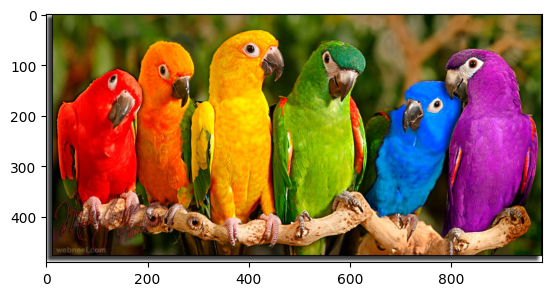

In [ ]:
img_path = './birds.jpg' # elephant
img = imread(img_path)

img.shape # H x W x C
img.size # multiplication of HxWxC
type(img)
img.dtype

plt.imshow(img)
plt.show()

RGB Image
R Component


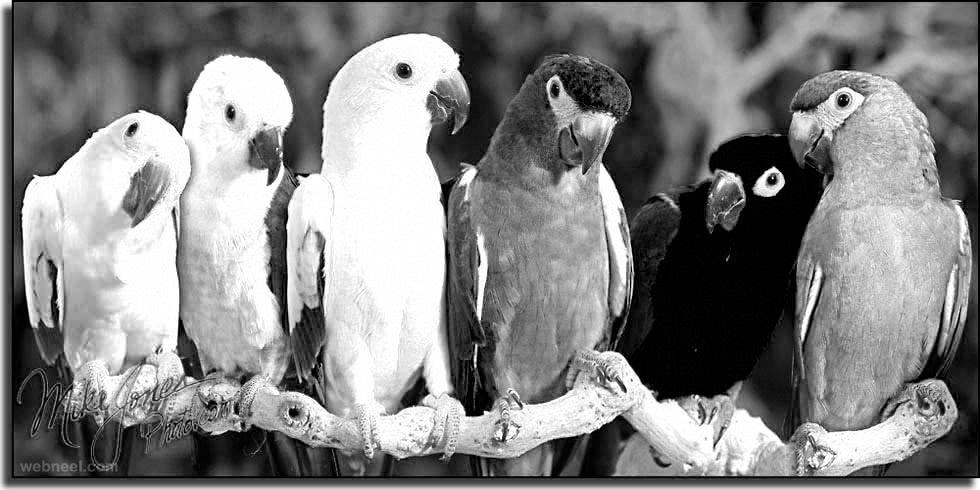

G Component


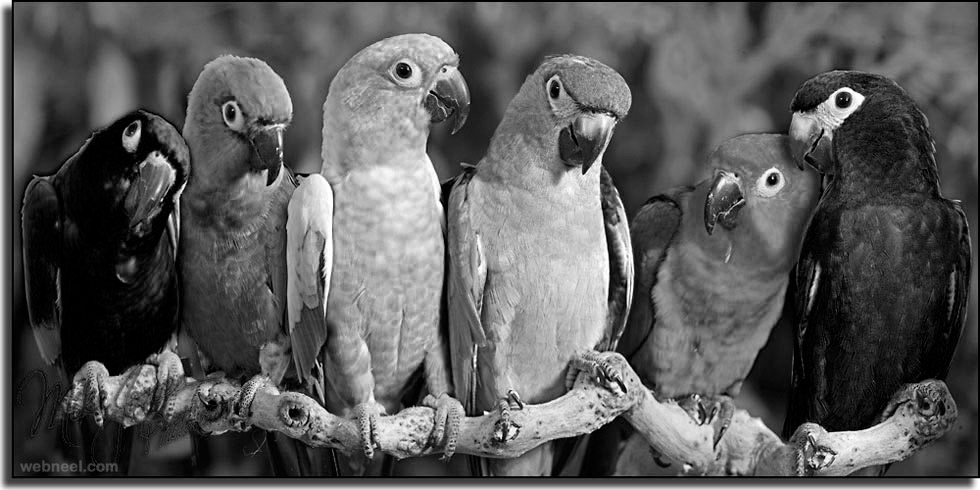

B Component


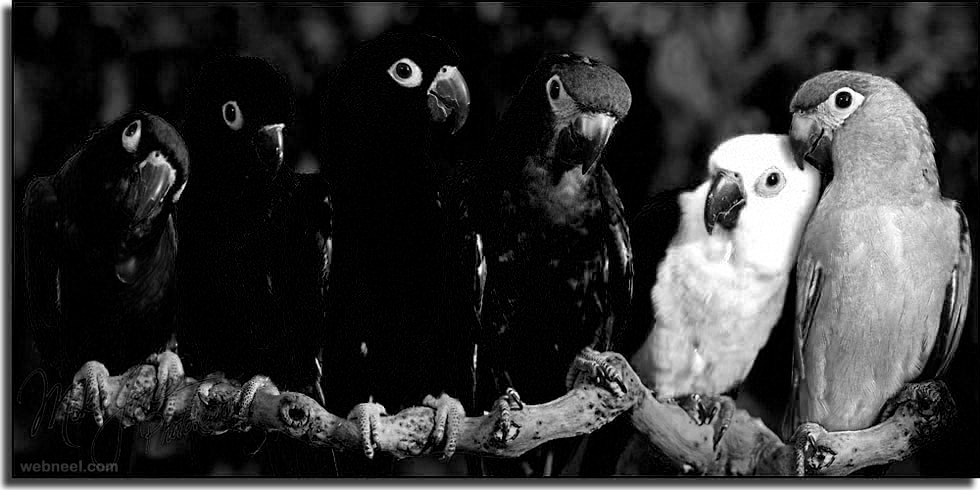

In [ ]:
# identify R G B colors

print("RGB Image")
R,G,B = cv2.split(img)
print("R Component")
cv2_imshow(R)
print("G Component")
cv2_imshow(G)
print("B Component")
cv2_imshow(B)

CMY Image
C Component


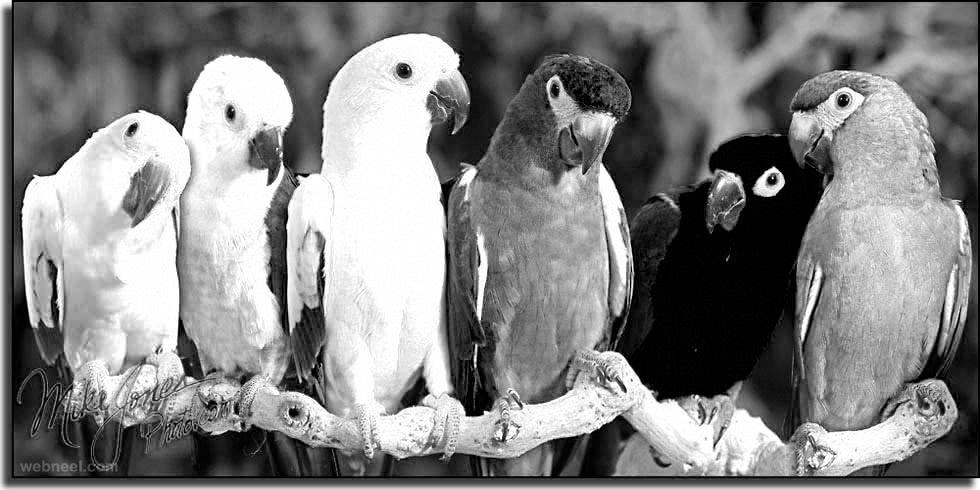

M Component


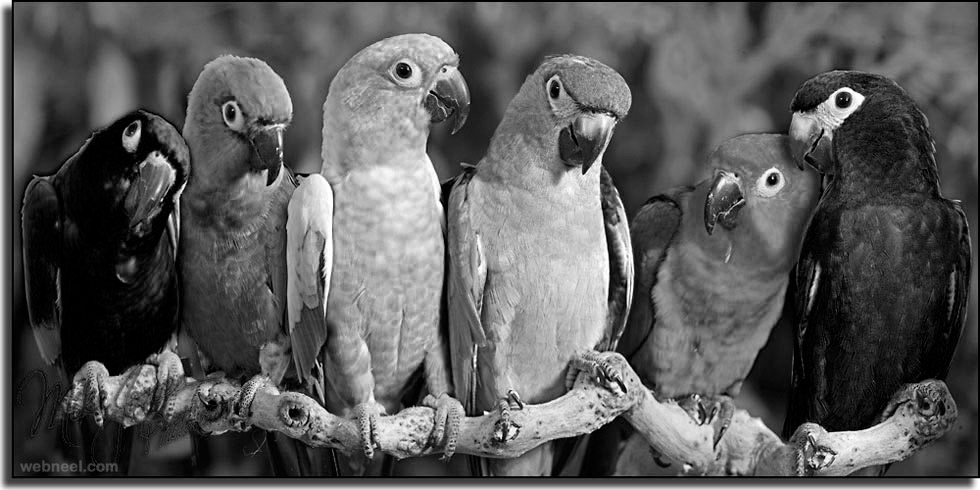

Y Component


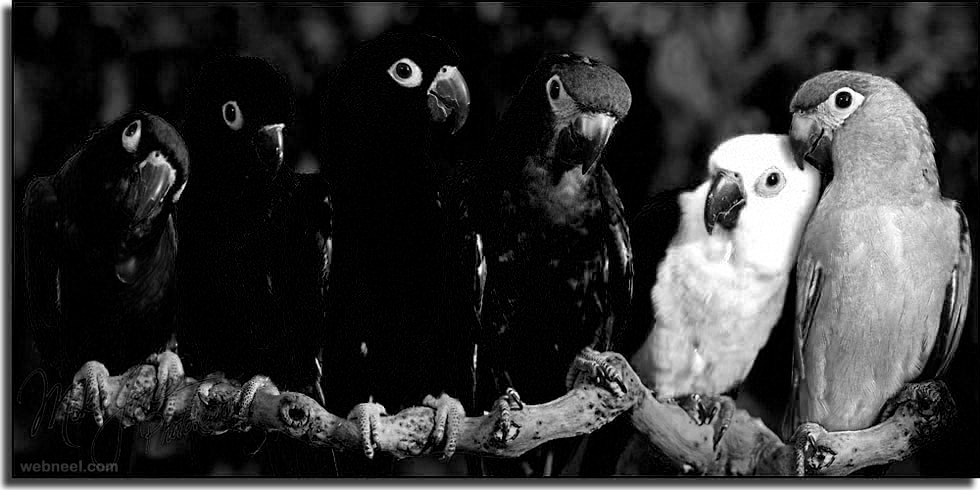

In [ ]:
# identify CMY colors

print("CMY Image")
C,M,Y = cv2.split(img)
print("C Component")
cv2_imshow(C)
print("M Component")
cv2_imshow(M)
print("Y Component")
cv2_imshow(Y)

# Extracting and counting object image from background

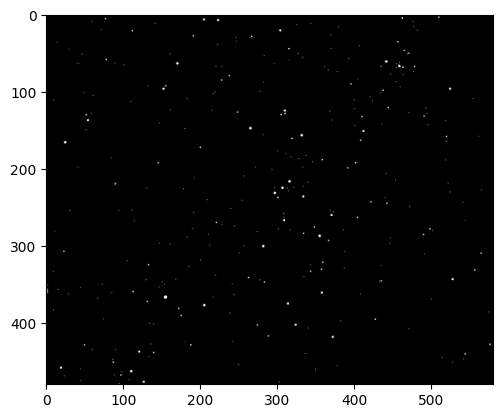

In [ ]:
im = imread("./wint_sky.gif", as_gray=True)
plt.imshow(im, cmap=plt.get_cmap('gray')) # cm.gray
plt.show()

In [ ]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log.shape

(308, 3)

Number of white dots counted :  308


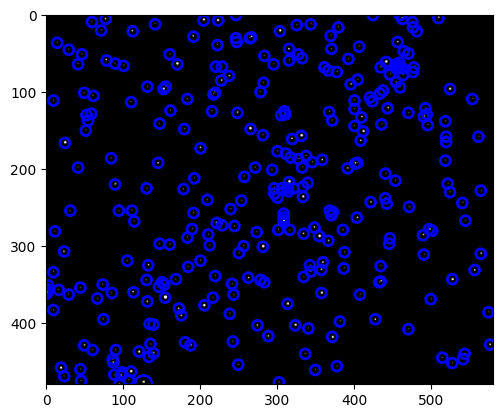

In [ ]:
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
# Count the white dots
numrows = len(blobs_log)
print("Number of white dots counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=plt.get_cmap('gray'))

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

## counting coins

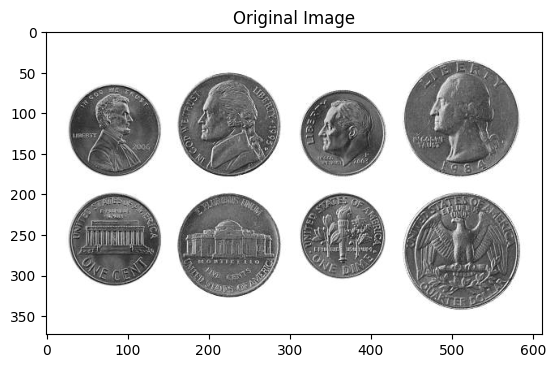

Number of coins counted: 1518


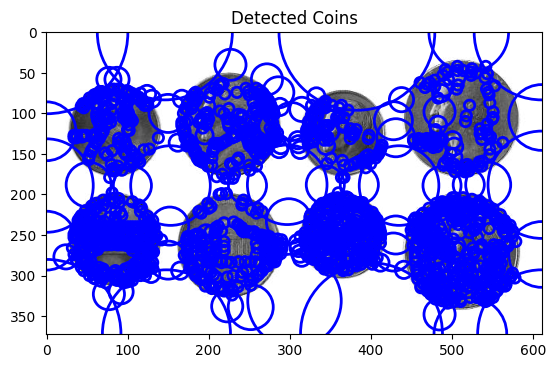

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import blob_log

# Load the image
image = imread("./coin.jpg", as_gray=True)

# Display the image
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.title('Original Image')
plt.show()

# Detect blobs (coins)
blobs_log = blob_log(image, max_sigma=300, num_sigma=100, threshold=.1)

# Adjust blob sizes
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Count the detected blobs (coins)
num_coins = len(blobs_log)
print("Number of coins counted:", num_coins)

# Visualize the detected coins
fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=plt.get_cmap('gray'))

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)

plt.title('Detected Coins')
plt.show()


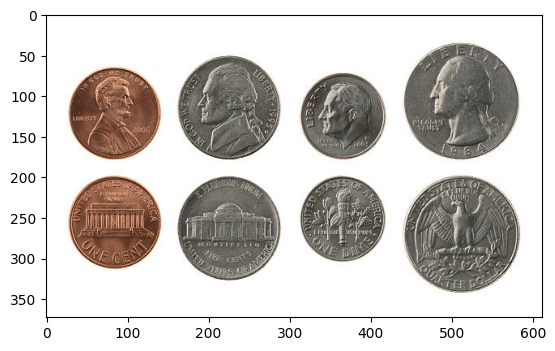

In [ ]:
from skimage import io

color_image = io.imread('./coin.jpg')
plt.imshow(color_image)

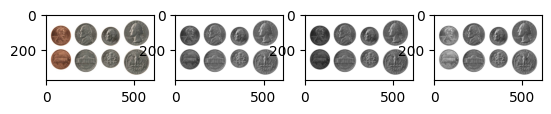

In [ ]:
red_image = color_image[:, :, 0]
green_image = color_image[:, :, 1]
blue_image = color_image[:, :, 2]

show_image([color_image, green_image, blue_image, red_image])

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

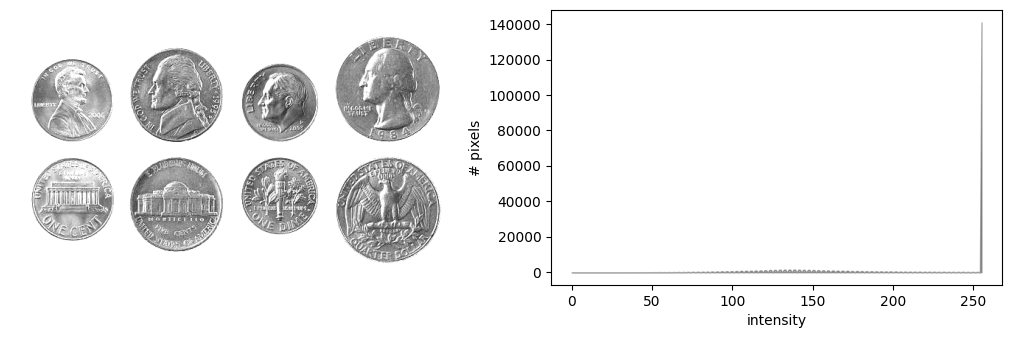

In [ ]:
from skimage import exposure
high_contrast = exposure.rescale_intensity(red_image, in_range=(10, 180))

imshow_with_histogram(high_contrast)

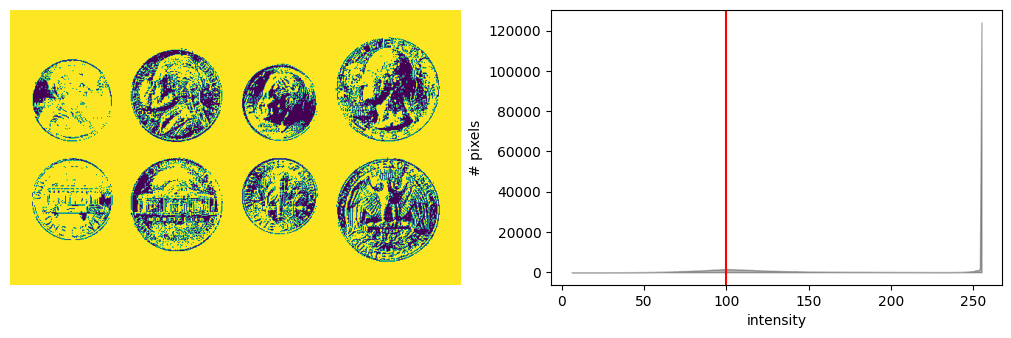

In [ ]:
threshold = 100 #the threshold is interchangeable to best fit the image
ax_image, ax_hist = imshow_with_histogram(red_image)
ax_image.imshow(red_image > threshold)
ax_hist.axvline(threshold, color='red')

180


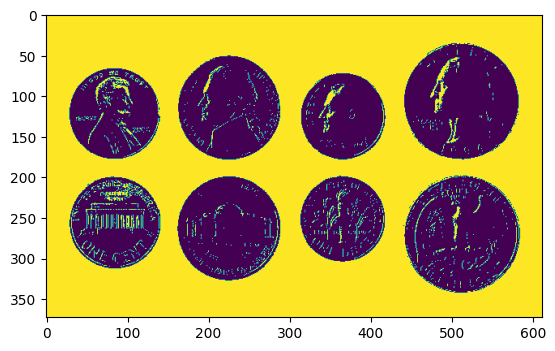

In [ ]:
from skimage import filters
threshold = filters.threshold_otsu(red_image) # 'otsu' this is the way to find out the best threshold for which image
print(threshold)

plt.imshow(red_image > threshold)

## detect finer coins

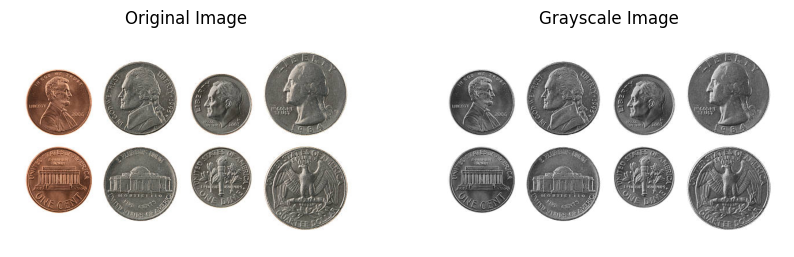

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import blob_log

# Load the image
im = imread("./coin.jpg")

# Convert the image to grayscale
im_gray = rgb2gray(im)

# Display the original and grayscale images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(im)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(im_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
plt.show()


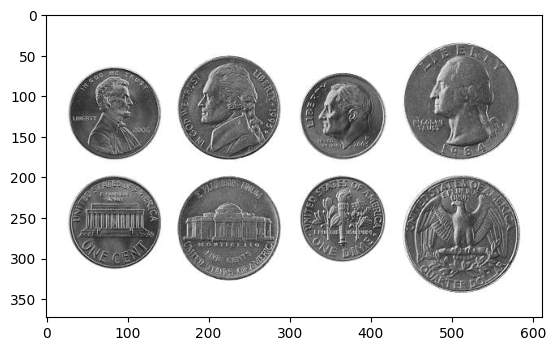

In [ ]:
show_image(im_gray)

Number of coins counted: 9


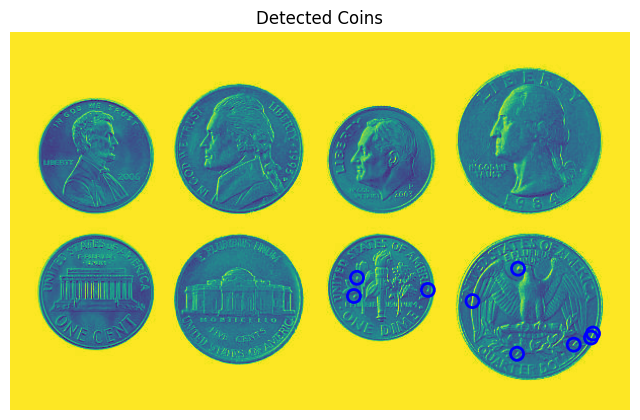

In [ ]:
# Detect blobs (coins) in the grayscale image
blobs_log = blob_log(red_image, max_sigma=15, num_sigma=35, threshold=.29)

# Adjust blob sizes
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Count the detected blobs (coins)
num_coins = len(blobs_log)
print("Number of coins counted:", num_coins)

# Visualize the detected coins on the original image
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(im_gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_title('Detected Coins')
ax.axis('off')
plt.show()

### masking to detect image object

In [ ]:
'''img[10, 20]
img[3, 10] = 0
img[:10] = 0
show_image(img)'''

imeg = rgb2gray(img_path)

mask = img < 87
img[mask] = 255
show_image(img)

IndexError: tuple index out of range

# New Section

Number of blob counted: 549


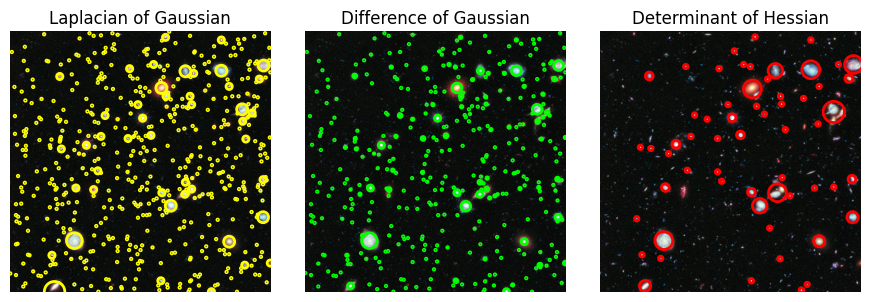

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

## adding counter
num_coins = len(blobs_log)
print("Number of blob counted:", num_coins)

plt.tight_layout()
plt.show()

In [ ]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

# Read sample image
I = imread('./birds.jpg', as_gray=True)

# Threshold
th = 100

# Thresholding
BW = im > th

# Label connected components
label_image = label(BW)

# Measure properties of labeled regions
regions = regionprops(label_image)

# Count number of blobs
numBlob = len(regions)

print("Number of blobs:", numBlob)


Number of blobs: 509
